In [1]:
#pip install --upgrade mysql-connector-python



In [2]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Lhrsd1234#",
    database="ecommerce",
    auth_plugin="mysql_native_password"
)

cur = db.cursor()


1.List all unique cities where customers are located.


In [4]:
query = """SELECT DISTINCT(customer_city)FROM customers"""
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

2. Count the number of orders placed in 2017.

In [6]:
query = """SELECT COUNT(order_id) FROM orders WHERE year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
"Total orders purchased in 2017 are:",data[0][0]

('Total orders purchased in 2017 are:', 135303)

3. Find the total sales per category.

In [8]:
#query = """ select upper(products.product_category) category, 
#round(sum(payments.payment_value),2) sales
#from products join order_items 
#on products.product_id = order_items.product_id
#join payments 
#on payments.order_id = order_items.order_id
#group by category
#"""

query = """
SELECT 
    products.`product category` AS category, 
round(SUM(payments.payment_value),2) AS sales
FROM 
    products
JOIN 
    order_items 
ON 
    products.product_id = order_items.product_id
JOIN 
    payments
ON 
    order_items.order_id = payments.order_id
GROUP BY 
    products.`product category`
"""

cur.execute(query)
data=cur.fetchall()
data

[('perfumery', 4560647.94),
 ('Furniture Decoration', 12871587.53),
 ('telephony', 4381938.46),
 ('bed table bath', 15412983.04),
 ('automotive', 7670648.98),
 ('computer accessories', 14267974.02),
 ('housewares', 9852823.17),
 ('babies', 4840961.94),
 ('toys', 5571339.21),
 ('Furniture office', 5821438.38),
 ('Cool Stuff', 7017282.0),
 ('HEALTH BEAUTY', 14916358.07),
 ('pet Shop', 2801420.73),
 ('General Interest Books', 582252.84),
 ('stationary store', 2856960.63),
 ('Watches present', 12862950.11),
 ('PCs', 2512093.94),
 ('climatization', 820535.94),
 ('Construction Tools Construction', 2173280.67),
 ('sport leisure', 12529148.03),
 ('Bags Accessories', 1684361.61),
 ('electronics', 2338713.9),
 ('Casa Construcao', 1229807.61),
 ('Games consoles', 1759323.41),
 ('Fashion Bags and Accessories', 1963424.52),
 ('home appliances', 859790.43),
 ('Garden tools', 7544526.76),
 ('Agro Industria e Comercio', 1068575.49),
 ('audio', 542921.58),
 ('technical books', 224238.96),
 ('Constructi

Calculate the percentage of orders that were paid in installments.

In [10]:
query = """
SELECT
    (SUM(
        CASE
            WHEN payment_installments >= 1 THEN 1
            ELSE 0
        END
    ) / COUNT(*)) * 100 AS percentage
FROM payments
"""
cur.execute(query)
data = cur.fetchall()
print(data)


[(Decimal('99.9981'),)]



Count the number of customers from each state.

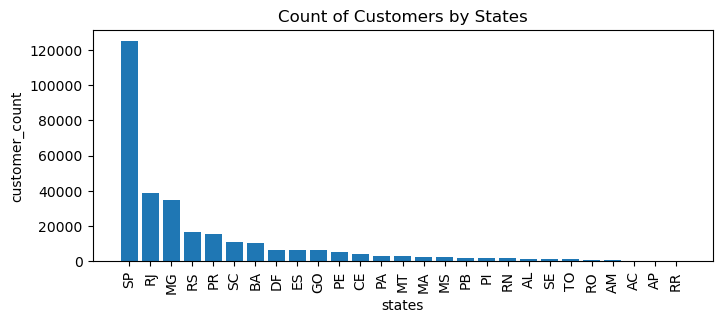

In [12]:
query = """SELECT customer_state,COUNT(customer_id) FROM customers GROUP BY customer_state """
cur.execute(query)
data=cur.fetchall()
data


import pandas as pd
import matplotlib.pyplot as plt 

df = pd.DataFrame(data, columns = ["state", "customer_count" ])
#pd.DataFrame: Creates a pandas DataFrame from the query results (data).
#data: Contains the results of the SQL query, which is a list of tuples representing the states and their respective customer counts.
#columns = ["state", "customer_count"]: Assigns column names to the DataFrame

df = df.sort_values(by = "customer_count", ascending= False)
#sort_values(by = "customer_count"): Sorts the DataFrame by the column customer_count.
#ascending = False: Ensures that the sorting is in descending order (largest to smallest)

plt.figure(figsize = (8,3))
#Create a bar plot with a specified width (8 inches) and height (3 inches).

plt.bar(df["state"], df["customer_count"])
#plt.bar: Creates a bar chart.
#df["state"]: x-axis
#df["customer_count"]: y-axis 

plt.xticks(rotation = 90)
#plt.xticks: Adjusts the labels on the x-axis.
#rotation = 90: Rotates the labels by 90 degrees to ensure they fit on the chart, especially if state names are long.

plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
#Add labels and a title

plt.show()#display plot

 Calculate the number of orders per month in 2018.